# Метрики в задаче регрессии

In [21]:
import numpy as np
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
x = np.arange(-5, 5, 10.0/500)
noise = np.random.normal(0,0.2, 500)

In [23]:
y = 1.0 + 0.5 * x + noise

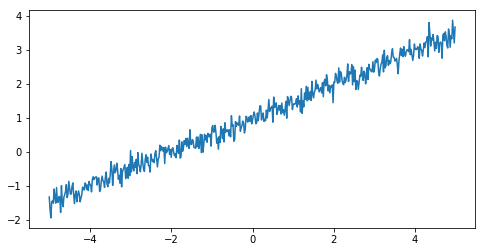

In [24]:
pyplot.figure(figsize(8,4))
pyplot.plot(x,y)

In [25]:
def func(lin):
    return metrics.mean_squared_error(lin[0] + lin[1]*x, y)

In [26]:
from scipy import optimize

In [27]:
res = optimize.minimize(func, [0, 0])
res

      fun: 0.037389826344722564
 hess_inv: array([[ 0.50346213, -0.00099082],
       [-0.00099082,  0.06073248]])
      jac: array([  1.42958015e-06,  -5.47384843e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.99101002,  0.49729881])

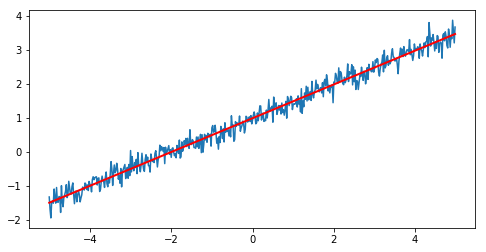

In [28]:
pyplot.plot(x,y)
pyplot.plot(x, res.x[0] + res.x[1]*x, linewidth=2, color = 'red')

In [29]:
noise_dis = np.random.normal(0,0.2, 75)
y_a = -1 + noise_dis
x_a = np.arange(-4.5, 4.5, 9.0/75.0)

In [30]:
x1 = np.hstack((x,x_a))
y1 = np.hstack((y,y_a))

In [31]:
def func_MSE(lin):
    return metrics.mean_squared_error(lin[0] + lin[1] *x1, y1)

def func_MAE(lin):
    return metrics.mean_absolute_error(lin[0] + lin[1] *x1, y1)

In [32]:
coef_1 = optimize.minimize(func_MSE, [0, 0])
coef_2 = optimize.minimize(func_MAE, [0, 0])

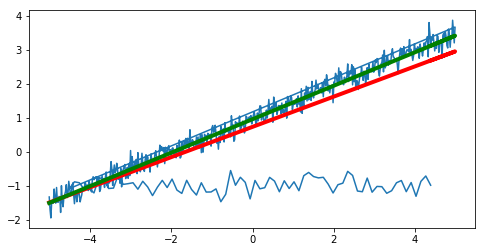

In [33]:
pyplot.plot(x1,y1)
pyplot.plot(x1, coef_1.x[0] + coef_1.x[1]*x1, linewidth=4, color = 'red')
pyplot.plot(x1, coef_2.x[0] + coef_2.x[1]*x1, linewidth=4, color = 'green')

Вывод: МAE устойчива к выбросам, MSE менее устойчив